In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [111]:
data = pd.read_csv('Fraud.csv')

In [112]:
data.shape

(6362620, 11)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [23]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [24]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [25]:
mapping = {
    'PAYMENT' : 0 , 
    'TRANSFER' : 1, 
    'CASH_OUT' : 2,
    'DEBIT' : 3,
    'CASH_IN' : 4 
}

data['type'] = data['type'].apply(lambda x : mapping[x])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 534.0+ MB


In [27]:
data.nameOrig.unique().shape

(6353307,)

In [28]:
data.nameDest.unique().shape

(2722362,)

In [29]:
data = data.drop(['nameOrig' , 'nameDest' , 'step'] , axis = 1)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(4)
memory usage: 436.9 MB


RangeIndex(start=0, stop=6362620, step=1)

In [33]:
data.to_csv("preprocessed.csv")

In [2]:
data = pd.read_csv("preprocessed.csv")

In [3]:
data.describe()

,Unnamed: 0,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,3.181310e+06,1.686309e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.836730e+06,1.491355e+00,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.590655e+06,0.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.181310e+06,2.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,4.771964e+06,2.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,6.362619e+06,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
print(data.columns)

Index(['Unnamed: 0', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [5]:
scaled_data = preprocessing.scale(data)

In [6]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [7]:
per_var = np.round(pca.explained_variance_ratio_*100 , decimals=1)
labels = ['PC' + str(i) for i in range(1 , len(per_var)+1)]

Text(0.5, 1.0, 'Scree Plot')

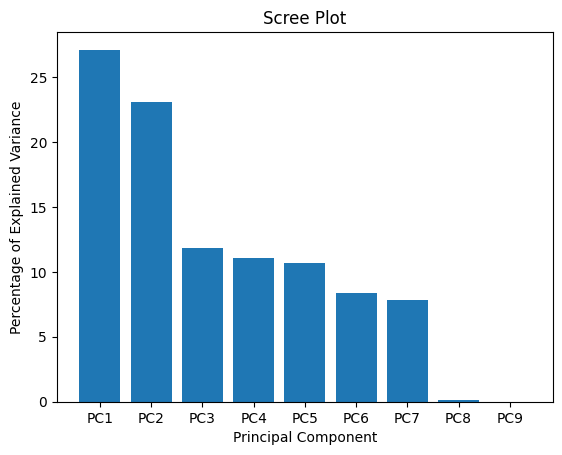

In [8]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')

In [9]:
pca_data.shape

(6362620, 9)

In [10]:
hehe = list(data.columns)
len(hehe)

9

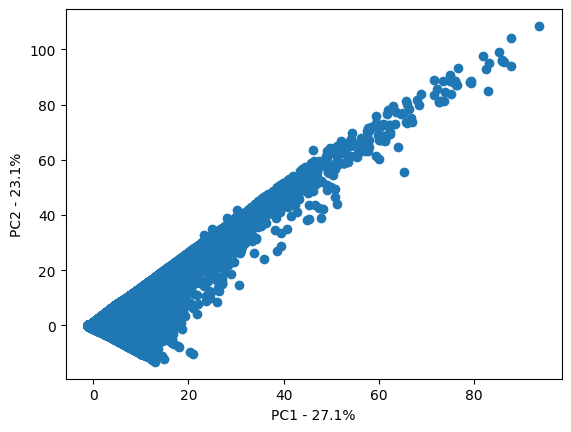

In [11]:
pca_df = pd.DataFrame(pca_data  , columns = labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.show()

In [14]:
data_fraud = data[data['isFraud'] == 1]
data_normal = data[data['isFraud'] == 0]

In [37]:
def do_PCA(dataframe , data_type , color):
    scaled_data = preprocessing.scale(dataframe)
    plt.figure(figsize=[20,10])
    pca = PCA()
    pca.fit(scaled_data)
    pca_data = pca.transform(scaled_data)

    per_var = np.round(pca.explained_variance_ratio_*100 , decimals=1)
    labels = ['PC' + str(i) for i in range(1 , len(per_var)+1)]

    plt.subplot(1,2,1)
    plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
    plt.ylabel('Percentage of Explained Variance')
    plt.xlabel('Principal Component')
    plt.title(f'Scree Plot P{data_type}')
    
    pca_df = pd.DataFrame(pca_data  , columns = labels)
    plt.subplot(1,2,2)
    plt.scatter(pca_df.PC1, pca_df.PC2 , color = color)
    plt.xlabel('PC1 - {0}%'.format(per_var[0]))
    plt.ylabel('PC2 - {0}%'.format(per_var[1]))
    plt.title(f'scatter plot {data_type}')

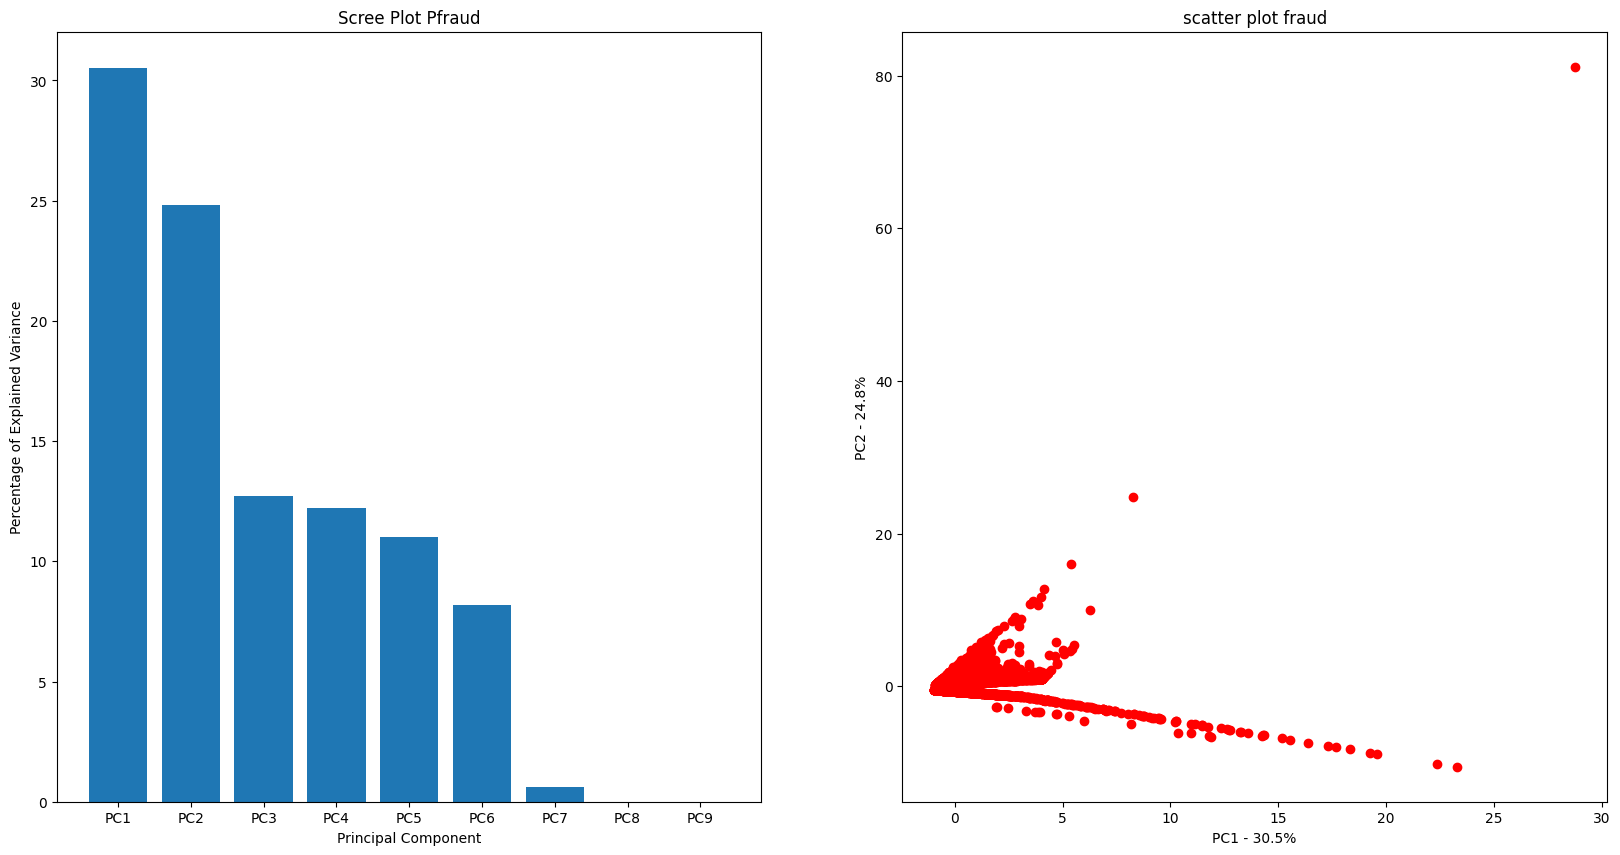

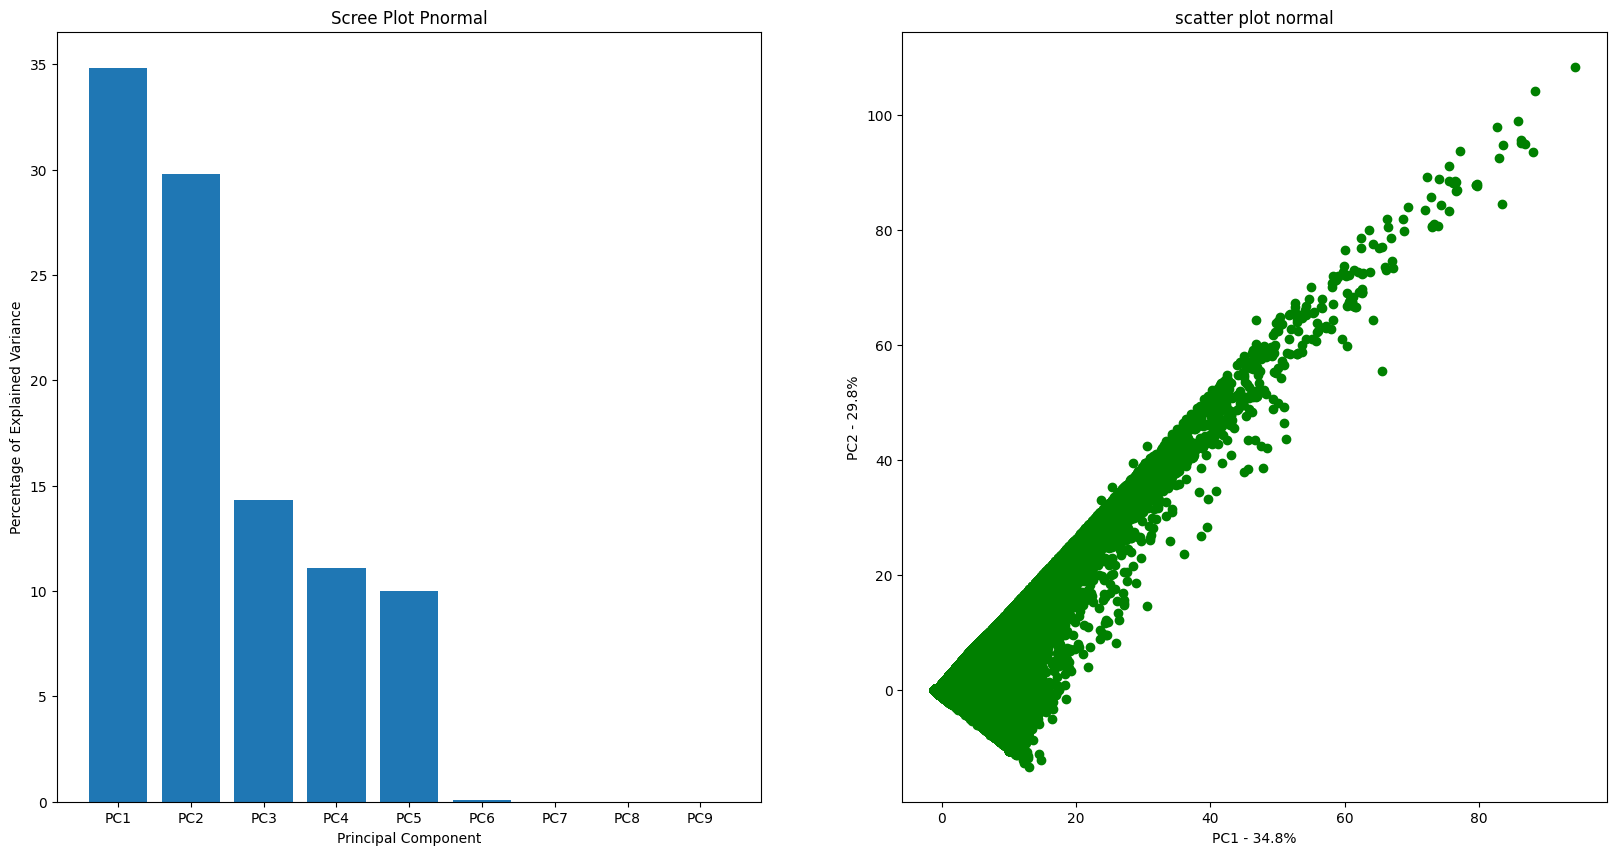

In [38]:
do_PCA(data_fraud , 'fraud' , 'r')
do_PCA(data_normal , 'normal' , 'g')

In [65]:
def do_PCA(dataframe1 , dataframe2 , data_type1 , data_type2 , color1 , color2):
    scaled_data1 = preprocessing.scale(dataframe1)
    scaled_data2 = preprocessing.scale(dataframe2)
    plt.figure(figsize=[10,10])
    pca1 = PCA()
    pca2 = PCA()
    pca1.fit(scaled_data1)
    pca2.fit(scaled_data2)
    pca_data1 = pca1.transform(scaled_data1)
    pca_data2 = pca2.transform(scaled_data2)

    per_var1 = np.round(pca1.explained_variance_ratio_*100 , decimals=1)
    per_var2 = np.round(pca2.explained_variance_ratio_*100 , decimals=1)
    labels = ['PC' + str(i) for i in range(1 , len(per_var1)+1)]

    plt.subplot(2,2,1)
    plt.bar(x=range(1,len(per_var2)+1), height=per_var1, tick_label=labels , color = color2 , width=0.5)
    plt.ylabel('Percentage of Explained Variance')
    plt.xlabel('Principal Component')
    plt.title(f'Scree Plot {data_type2}')

    plt.subplot(2,2,2)
    plt.bar(x=range(1,len(per_var1)+1), height=per_var1, tick_label=labels , color = color1 , width=0.5)
    
    plt.ylabel('Percentage of Explained Variance')
    plt.xlabel('Principal Component')
    plt.title(f'Scree Plot {data_type1}')
    
    pca_df1 = pd.DataFrame(pca_data1  , columns = labels)
    pca_df2 = pd.DataFrame(pca_data2  , columns = labels)
    plt.subplot(2,2,(3,4))
    plt.scatter(pca_df2.PC1, pca_df2.PC2 , color = color2 , alpha = 0.1)
    plt.scatter(pca_df1.PC1, pca_df1.PC2 , color = color1 , marker = 'x')
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'scatter plot')

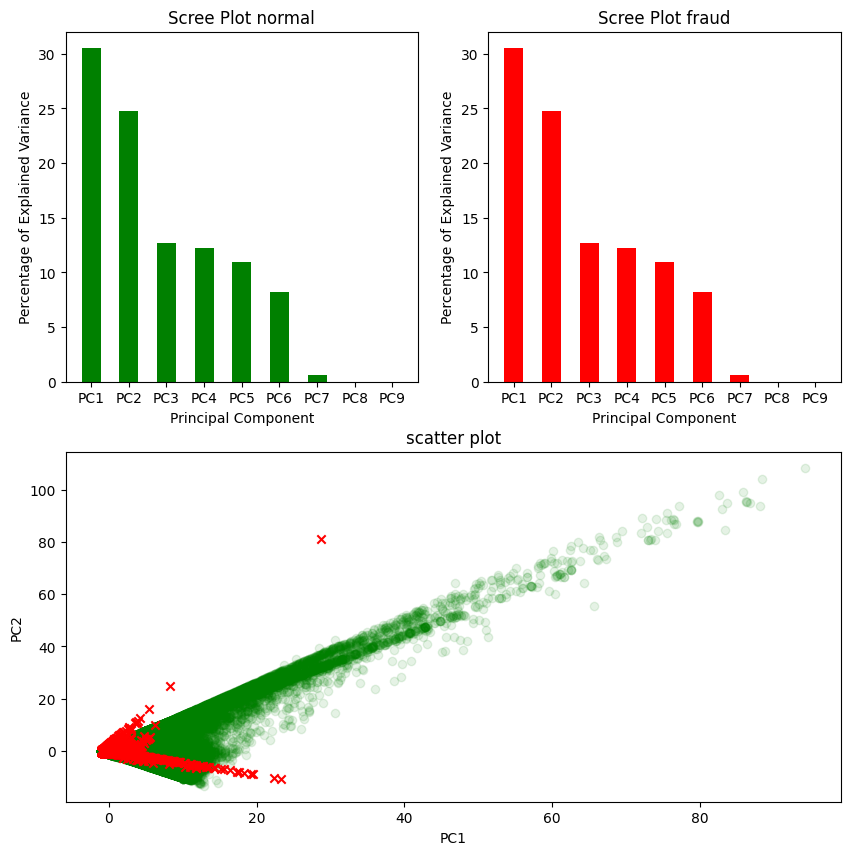

In [66]:
do_PCA(data_fraud, data_normal , 'fraud' , 'normal' , 'r' , 'g')